In [49]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from pyclustertend import (
    hopkins,
    vat,
    ivat,
    assess_tendency_by_metric,
    assess_tendency_by_mean_metric_score,
)

In [50]:
iris = datasets.load_iris()
cluster = KMeans(n_clusters=3)
clus = cluster.fit_predict(iris.data)

print(clus)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


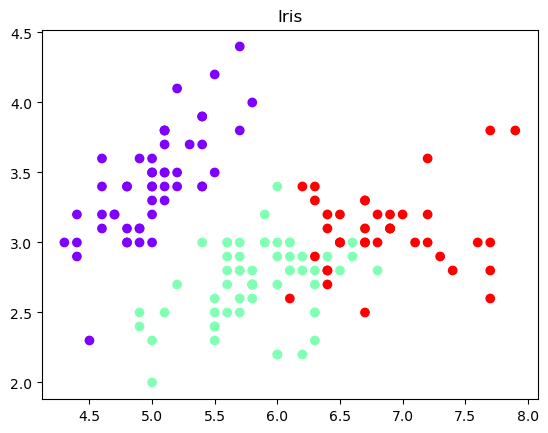

In [51]:
plt.title("Iris")
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=clus, cmap="rainbow")
plt.show()

In [52]:
clust1 = scale(iris.data)
clust2 = np.random.rand(150, 4)

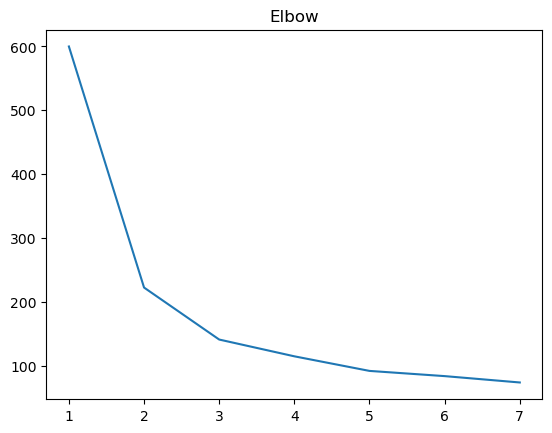

In [53]:
# Whithin-cluster sum of squares: Elbow method
inertia = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i).fit(clust1)
    kmeans.fit(clust1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia)
plt.title("Elbow")
plt.show()

In [54]:
inertia

[600.0000000000001,
 222.36170496502308,
 140.90153181202444,
 114.62685984300724,
 91.76966037754849,
 83.6094406937898,
 73.64585478356918]

In [55]:
# Hopkins statistic: Clustering tendency -> 0.5: random data, 1: clusterable data
hopkins(clust1, 150)

0.17616345486903093

In [56]:
# Hopkins statistic: Clustering tendency -> 0.5: random data, 1: clusterable data
hopkins(clust2, 150)

0.5000628198755102

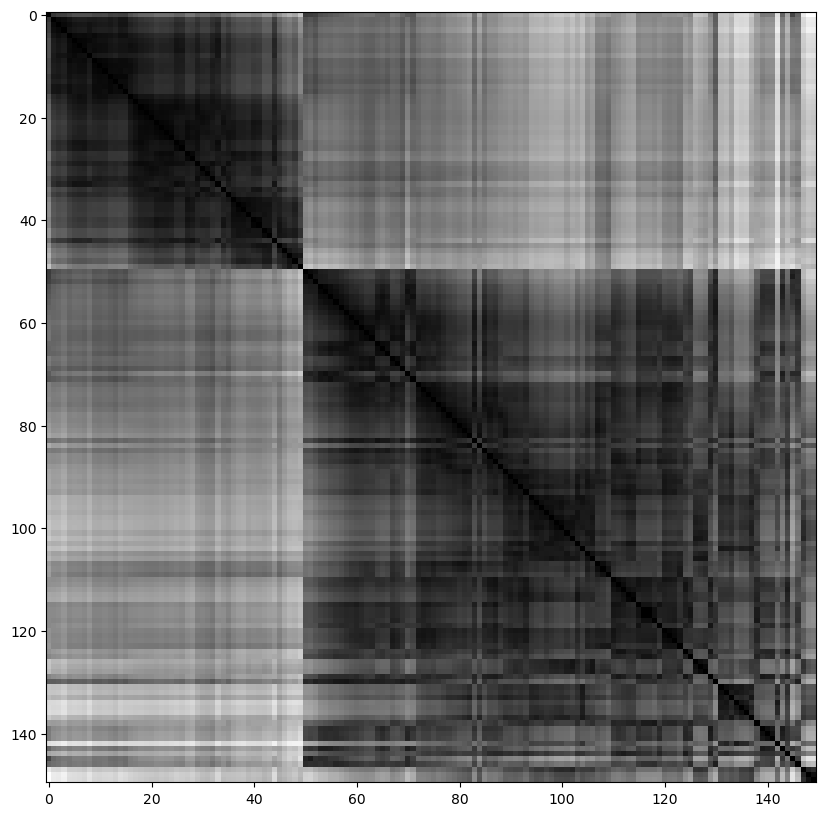

In [57]:
vat(clust1)

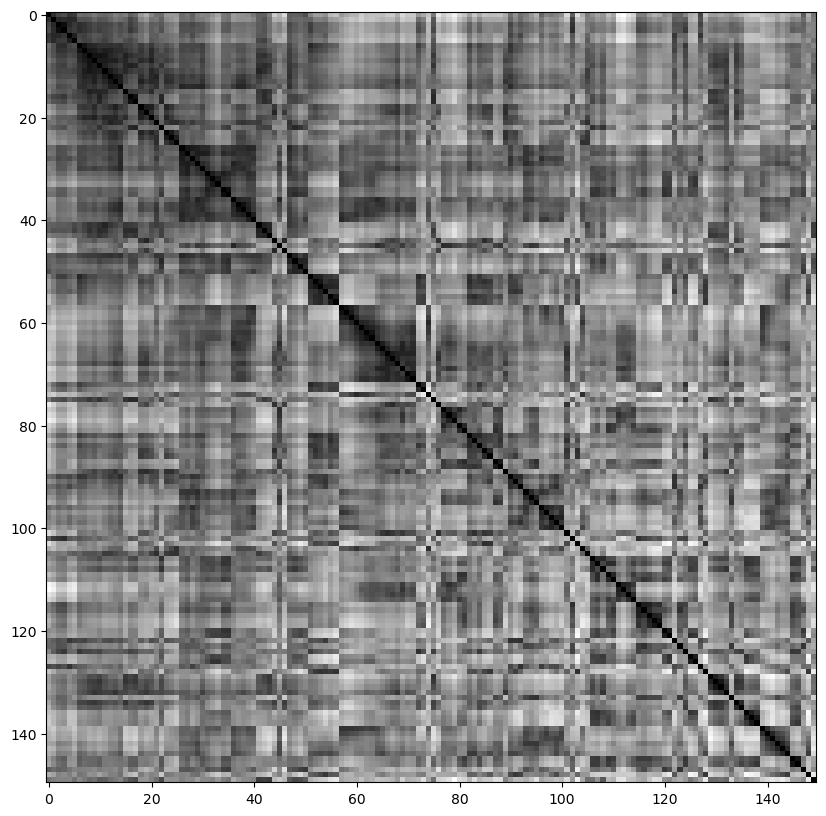

In [58]:
vat(clust2)

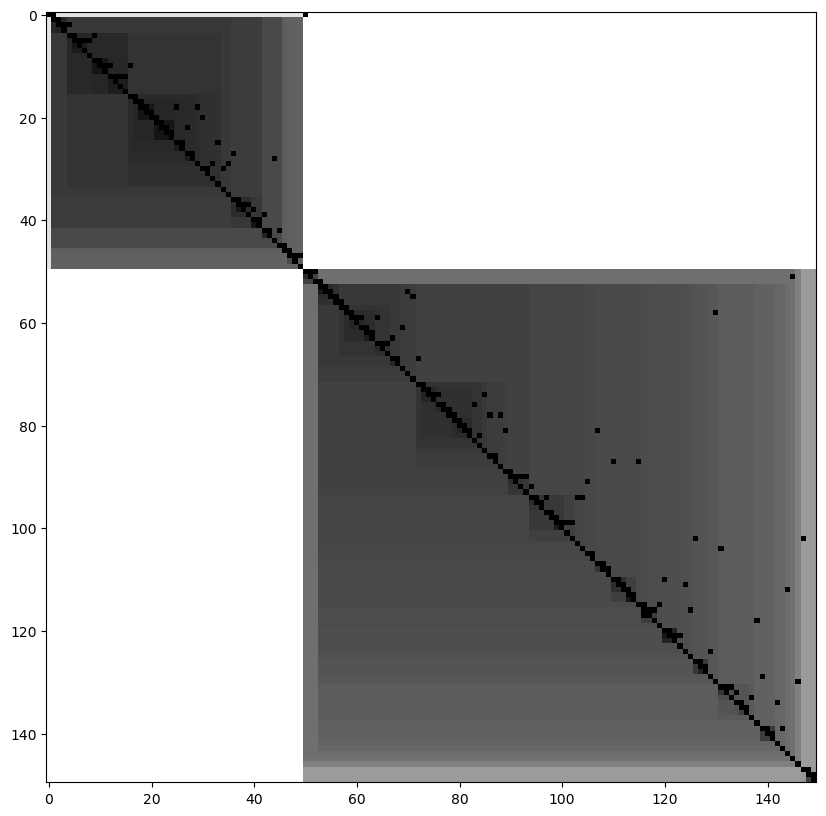

In [59]:
ivat(clust1)

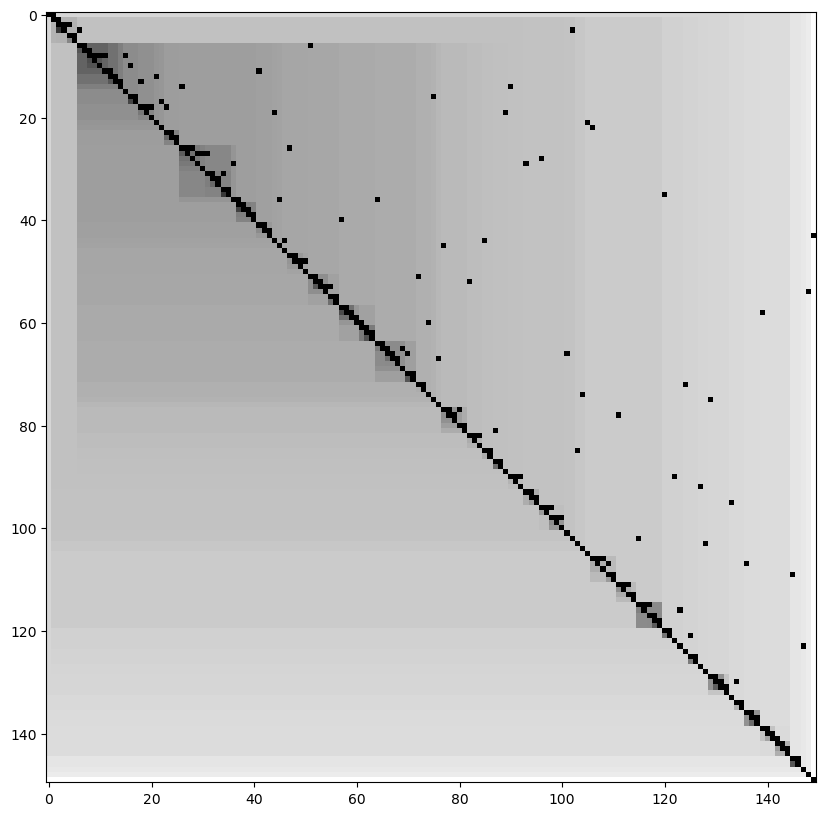

In [60]:
ivat(clust2)

In [61]:
# Assessing clustering tendency by silhouette: 0.25: random data, 0.5: clusterable data
m = assess_tendency_by_metric(clust1, "silhouette", 5)
print(m)

(2, array([0.58175005, 0.45663381, 0.41308512, 0.37776414]))


In [62]:
# Assessing clustering tendency by silhouette: 0.25: random data, 0.5: clusterable data
m = assess_tendency_by_metric(clust2, "silhouette", 5)
print(m)

(5, array([0.19899793, 0.21566119, 0.22598478, 0.23754718]))


In [63]:
# Assessing clustering tendency by mean of three metrics
m = assess_tendency_by_mean_metric_score(clust1, 5)
print(m)

2.0


In [64]:
m = assess_tendency_by_mean_metric_score(clust2, 5)
print(m)

4.0
